In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
from pandas import read_csv

In [21]:
NYC = read_csv('NYC_2000s.csv',header=0)
NYC.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13',
       'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT22'],
      dtype='object')

In [22]:
nyc_df=NYC.drop(['STATION','LATITUDE', 'LONGITUDE', 'ELEVATION','DAPR','MDPR','WT01', 'WT02','WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13','WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT22'], axis=1)
nyc_df.head()

,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,"NY CITY CENTRAL PARK, NY US",2000-01-01,0.0,0.0,0.0,5.6,10.0,1.1
1,"NY CITY CENTRAL PARK, NY US",2000-01-02,0.0,0.0,0.0,11.1,15.6,6.1
2,"NY CITY CENTRAL PARK, NY US",2000-01-03,0.0,0.0,0.0,14.4,17.8,10.6
3,"NY CITY CENTRAL PARK, NY US",2000-01-04,17.8,0.0,0.0,11.7,15.6,7.8
4,"NY CITY CENTRAL PARK, NY US",2000-01-05,0.0,0.0,0.0,3.3,8.3,-1.7


In [23]:
nyc_df.dropna

<bound method DataFrame.dropna of                              NAME        DATE  PRCP  SNOW  SNWD  TAVG  TMAX  \
0     NY CITY CENTRAL PARK, NY US  2000-01-01   0.0   0.0   0.0   5.6  10.0   
1     NY CITY CENTRAL PARK, NY US  2000-01-02   0.0   0.0   0.0  11.1  15.6   
2     NY CITY CENTRAL PARK, NY US  2000-01-03   0.0   0.0   0.0  14.4  17.8   
3     NY CITY CENTRAL PARK, NY US  2000-01-04  17.8   0.0   0.0  11.7  15.6   
4     NY CITY CENTRAL PARK, NY US  2000-01-05   0.0   0.0   0.0   3.3   8.3   
...                           ...         ...   ...   ...   ...   ...   ...   
7876        NEW YORK 8.8 N, NY US  2020-07-07   4.1   NaN   NaN   NaN   NaN   
7877        NEW YORK 8.8 N, NY US  2020-07-08   0.0   NaN   NaN   NaN   NaN   
7878        NEW YORK 8.8 N, NY US  2020-07-09   2.8   NaN   NaN   NaN   NaN   
7879        NEW YORK 8.8 N, NY US  2020-07-10   0.0   NaN   NaN   NaN   NaN   
7880        NEW YORK 8.8 N, NY US  2020-07-11  79.0   NaN   NaN   NaN   NaN   

      TMIN  
0   

In [24]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7881 entries, 0 to 7880
Data columns (total 8 columns):
NAME    7881 non-null object
DATE    7881 non-null object
PRCP    7842 non-null float64
SNOW    7504 non-null float64
SNWD    7392 non-null float64
TAVG    2018 non-null float64
TMAX    7498 non-null float64
TMIN    7498 non-null float64
dtypes: float64(6), object(2)
memory usage: 492.7+ KB


In [25]:
x_axis = nyc_df.DATE
y_axis = nyc_df.TMAX

In [26]:
# Call describe on df and transpose it due to the large number of columns
spread = nyc_df.describe().T
spread

,count,mean,std,min,25%,50%,75%,max
PRCP,7842.0,3.630490,9.986375,0.0,0.0,0.0,1.5,192.3
SNOW,7504.0,2.247601,20.237856,0.0,0.0,0.0,0.0,693.0
SNWD,7392.0,9.318452,47.103289,0.0,0.0,0.0,0.0,584.0
TAVG,2018.0,12.655352,9.627704,-17.8,5.6,12.8,21.1,31.7
TMAX,7498.0,17.106362,10.061486,-10.5,8.9,17.8,26.1,40.0
TMIN,7498.0,9.213897,9.198206,-18.2,2.2,9.4,17.2,28.9


In [27]:
# precalculate interquartile range for ease of use in next calculation
IQR = spread['75%'] - spread['25%']
IQR 

PRCP     1.5
SNOW     0.0
SNWD     0.0
TAVG    15.5
TMAX    17.2
TMIN    15.0
dtype: float64

In [28]:
# Assign X (data) and y (target)
X = nyc_df['DATE']
y = nyc_df["TMAX"].values.reshape(-1, 1)
print(X.shape, y.shape)

(7881,) (7881, 1)


In [29]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

# X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

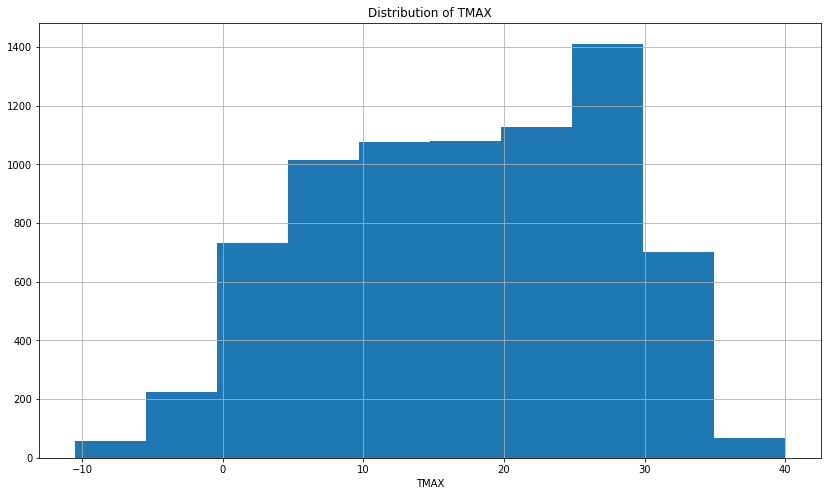

In [34]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
nyc_df.TMAX.hist()
plt.title('Distribution of TMAX')
plt.xlabel('TMAX')
plt.show()

In [35]:
nyc_df.corr()[['TMAX']].sort_values('TMAX')

,TMAX
SNWD,-0.293091
SNOW,-0.179997
PRCP,-0.001797
TMIN,0.957605
TAVG,0.965606
TMAX,1.000000
